# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:36:39.178911: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:36:39.205796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:36:39.634608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "CONCURRENCE"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:36:40.621436: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:36:40.643847: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395801.244270  237046 service.cc:145] XLA service 0x7bf670009460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395801.244294  237046 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:36:41.256700: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:36:41.328924: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.6875 - loss: 0.6814

 95/150 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6551 - loss: 0.6250

I0000 00:00:1716395801.923012  237046 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6721 - loss: 0.6013 - val_accuracy: 0.8167 - val_loss: 0.3985


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8125 - loss: 0.3909

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8844 - loss: 0.3164

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8902 - loss: 0.3038 - val_accuracy: 0.9525 - val_loss: 0.1669


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.1086

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9641 - loss: 0.1271

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9641 - loss: 0.1265 - val_accuracy: 0.9717 - val_loss: 0.1187


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0775

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9728 - loss: 0.0958

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9731 - loss: 0.0954 - val_accuracy: 0.9767 - val_loss: 0.1009


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0304

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9834 - loss: 0.0760

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9826 - loss: 0.0774 - val_accuracy: 0.9817 - val_loss: 0.0924


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0473

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.9846 - loss: 0.0678

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9843 - loss: 0.0685 - val_accuracy: 0.9767 - val_loss: 0.0903


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.3578

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9812 - loss: 0.0785

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9816 - loss: 0.0766 - val_accuracy: 0.9817 - val_loss: 0.0877


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0124

112/150 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9868 - loss: 0.0600

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9865 - loss: 0.0608 - val_accuracy: 0.9817 - val_loss: 0.0815


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0426

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.9871 - loss: 0.0512

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9867 - loss: 0.0536 - val_accuracy: 0.9842 - val_loss: 0.0817


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0482

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9844 - loss: 0.0581

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9849 - loss: 0.0578 - val_accuracy: 0.9842 - val_loss: 0.0778


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0468

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.9866 - loss: 0.0630

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9867 - loss: 0.0618 - val_accuracy: 0.9858 - val_loss: 0.0757


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.0942

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9881 - loss: 0.0469

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9884 - loss: 0.0471 - val_accuracy: 0.9825 - val_loss: 0.0765


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0087

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9866 - loss: 0.0562

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9873 - loss: 0.0540 - val_accuracy: 0.9892 - val_loss: 0.0679


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0551

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9922 - loss: 0.0386

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9922 - loss: 0.0389 - val_accuracy: 0.9858 - val_loss: 0.0695


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0154

109/150 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.9908 - loss: 0.0386

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.9908 - loss: 0.0388 - val_accuracy: 0.9892 - val_loss: 0.0641


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0130

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9949 - loss: 0.0307

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9947 - loss: 0.0313 - val_accuracy: 0.9900 - val_loss: 0.0650


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0167

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9959 - loss: 0.0255

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9955 - loss: 0.0266 - val_accuracy: 0.9917 - val_loss: 0.0629


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0156

101/150 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9943 - loss: 0.0327

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.9944 - loss: 0.0314 - val_accuracy: 0.9908 - val_loss: 0.0574


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0046

128/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9959 - loss: 0.0227

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9957 - loss: 0.0235 - val_accuracy: 0.9900 - val_loss: 0.0573


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0236

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9970 - loss: 0.0178

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9967 - loss: 0.0187 - val_accuracy: 0.9892 - val_loss: 0.0618


2024/05/22 18:36:44 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0083

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9849 - loss: 0.0664


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/22 18:36:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 6


Model saved in run 51a481bec9ce45d892d8858365bfd84d


Created version '6' of model 'QuantumStateClassifier-CONCURRENCE'.


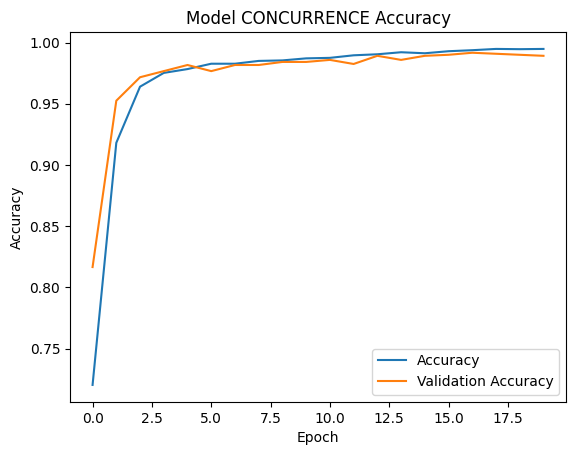

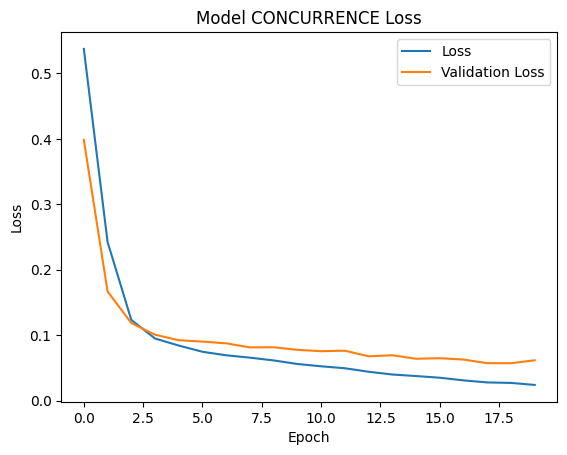

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in parameter_witness.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
